# Homework 5

Installed packages needed for this exercise.

In [2]:
library(httr)
library(httr2)
library(jsonlite)
library(tm)
library(wordcloud)
library(RColorBrewer)
library(SnowballC)



## Rest API

In this exercise, we aim to fetch data from the Nobel Prize REST API, specifically focusing on the Nobel Prize in Physics for the year 2022. By sending a request we retrieve the prize information in JSON format. From this data, we will extract the motivations provided for each laureate's award. These motivations explain why the laureates were honored with the prize. We will then preprocess the text by converting it to lowercase, removing punctuation, numbers, common stopwords, and extra whitespace. Finally, we will visualize the most frequent terms from the motivations using a word cloud. This visualization will help us identify key themes in the field of physics research, with the most commonly used words displayed in the word cloud.

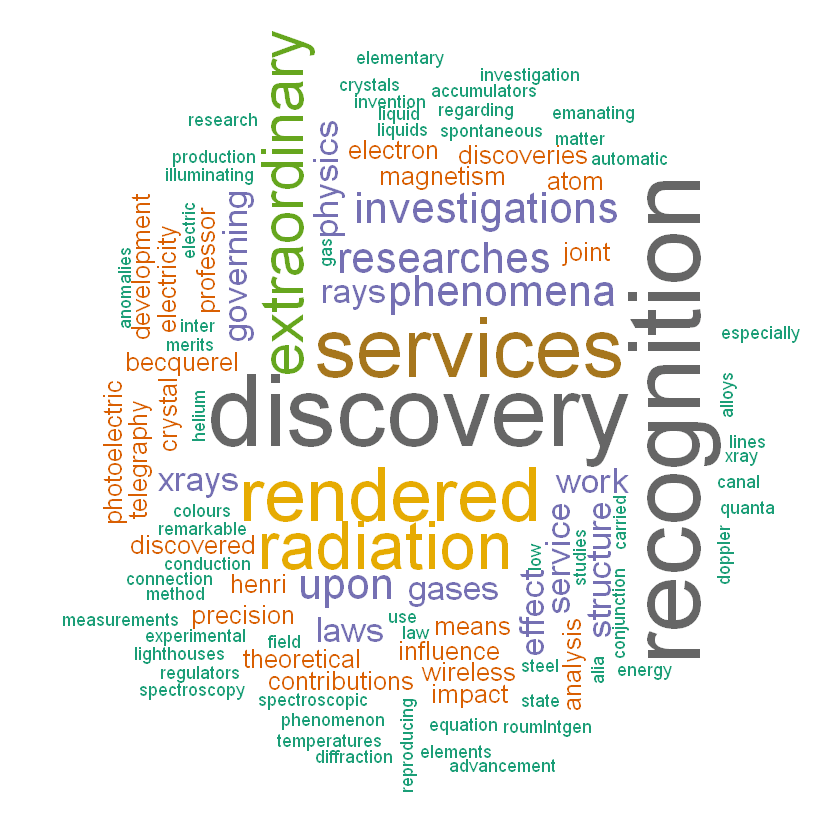

In [3]:
#URL defined and fetching the Nobel Prize data
nobel_api_url <- "https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeCategory=phy"
nobel_request <- request(nobel_api_url)
nobel_response <- req_perform(nobel_request)
nobel_data <- resp_body_json(nobel_response)

#Extracting motivations from the dataset
motivations <- sapply(nobel_data$nobelPrizes, function(prize) {
  sapply(prize$laureates, function(laureate) {
    laureate$motivation$en  #
#Extracting the English motivation text
  })
})

#Flatten the list of motivations into a vector
motivations <- unlist(motivations)

#Creating a text corpus from the motivations
text_corpus <- Corpus(VectorSource(motivations))

# Preprocess the text data
suppressWarnings({
  cleaned_corpus <- tm_map(text_corpus, stripWhitespace)        
#Removing extra whitespace
  cleaned_corpus <- tm_map(cleaned_corpus, tolower)            
#Converting the text to lowercase
  cleaned_corpus <- tm_map(cleaned_corpus, removePunctuation)  
#Removing punctuation
  cleaned_corpus <- tm_map(cleaned_corpus, removeWords, stopwords("english"))  
#Removing stopwords
  cleaned_corpus <- tm_map(cleaned_corpus, removeNumbers)      
#Removing numbers
})

#Generating a word cloud
wordcloud(
  cleaned_corpus, 
  scale = c(5, 0.5),          
#Word size scaling
  max.words = 100,            
#Maximum number of words
  random.order = FALSE,       
#Placing the most frequent words at the center
  rot.per = 0.35,             
#Rotation percentage
  use.r.layout = FALSE,       
#Using default layout
  colors = brewer.pal(8, "Dark2"),  
#Word colors
  min.freq = 1                
#Minimum frequency of words to include
)


As we can see from the word cloud the most common words are "discovery", "recognition", "services", "extraordinary", "rendered" and "radiation". 

## Web Scraping

The goal of this part of the assignment is to scrape data from the website https://books.toscrape.com/. We want to create a table that contains key details about the books, specifically the UPC, title, price, and rating, from the first three pages of the site.

The code first sets up a URL pattern to get the correct address for each page. Then, it creates an empty table with columns for UPC, title, price, and rating. The program looks at each of the first three pages, gets the book information, and adds it to the table. After the loop finishes, the first five rows of the table are printed, showing only the UPC, title, price, and rating for the books.

In [42]:
url_pattern <- "https://books.toscrape.com/catalogue/page-%s.html"
#The URL pattern for pages, %s acts as a placeholder that will be replaced with the page number

books_info <- data.frame(upc = character(), title = character(), price = character(), rating = character(), stringsAsFactors = FALSE)
#Empty data frame to store book information

for (page_number in 1:3) {
  url <- sprintf(url_pattern, page_number)  
  page_data <- scrape_books_and_details(url)
  books_info <- rbind(books_info, page_data)
}
#Loop through the three first pages
#Scraping the book details and storing it in the table

print(head(books_info, n = 5))
#Printing the desired table

               upc                                 title  price rating
1 a897fe39b1053632                  A Light in the Attic £51.77  Three
2 90fa61229261140a                    Tipping the Velvet £53.74    One
3 6957f44c3847a760                            Soumission £50.10    One
4 e00eb4fd7b871a48                         Sharp Objects £47.82   Four
5 4165285e1663650f Sapiens: A Brief History of Humankind £54.23   Five


As we can see from the table, we have successfully achieved the table format as requested in the homework. The table now includes the correct columns for UPC, title, price, and rating.